In [13]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [30]:
#sample data
x, y = make_blobs(n_samples=1000, n_features=3, centers=3, cluster_std=[1, 2, 3], center_box=(10, 65))

In [31]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.eigen_values = None
        self.components = None

    def fit(self, x):
        self.mean = np.mean(x, axis=0).reshape(1, -1)
        #center data
        x_centered = (x - self.mean)
        #calculate the covariance matrix
        C = np.cov(x_centered.T)

        eigen_values, eigen_vectors = np.linalg.eig(C)

        idx = eigen_values.argsort()[::-1]
        eigen_values = eigen_values[idx]
        eigen_vectors = eigen_vectors[:, idx]
        self.eigen_values = eigen_values

        if self.n_components is not None:
            eigen_vectors = eigen_vectors[:, :self.n_components]

        self.components = eigen_vectors / np.linalg.norm(eigen_vectors, axis=0, keepdims=True)


    def transform(self, x):
        x_centered = x - self.mean
        x_transformed = np.matmul(x_centered, self.components)
        return x_transformed

In [32]:
pca = PCA(n_components=2)

In [33]:
pca.fit(x)

In [34]:
x_out = pca.transform(x)

In [36]:
pca.eigen_values

array([179.23164069,  55.99116949,   4.33877392])

In [37]:
x_out[:10]

array([[  6.58718746,   8.38028987],
       [-21.17966719,   0.43004255],
       [-17.31022301,  -3.55174894],
       [ 10.41341649,  -9.38873384],
       [  6.86225384,   9.01251292],
       [  7.4799175 ,  11.15785827],
       [ 11.91502013,  -5.38435278],
       [ 14.93258769,  -8.70157555],
       [  7.60986705,   8.94188451],
       [-17.7363714 ,  -1.00787666]])

In [41]:
pca.components

array([[-0.8953118 ,  0.20050131],
       [ 0.44542684,  0.39612558],
       [ 0.00342198,  0.89603781]])

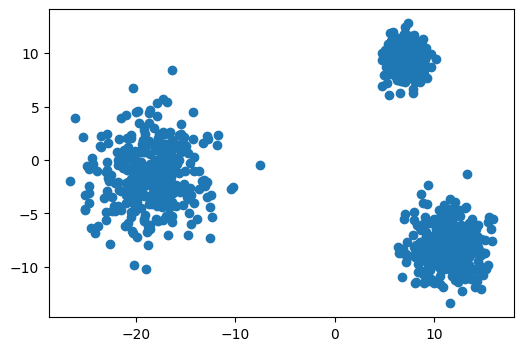

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(x_out[:, 0], x_out[:, 1])
origin = np.array([[0, 0], [0, 0]])
ax.quiver(*origin, eigen_vectors[:, 0], eigen_vectors[:, 1], scale=10)

In [28]:
origin.shape

(2,)

In [21]:
eigen_vectors[:, 1][0]

0.13161255632153845

In [19]:
ax.quiver?

Signature: ax.quiver(*args, data=None, **kwargs)
Docstring:
Plot a 2D field of arrows.

Call signature::

  quiver([X, Y], U, V, [C], **kwargs)

*X*, *Y* define the arrow locations, *U*, *V* define the arrow directions, and
*C* optionally sets the color.

**Arrow length**

The default settings auto-scales the length of the arrows to a reasonable size.
To change this behavior see the *scale* and *scale_units* parameters.

**Arrow shape**

The arrow shape is determined by *width*, *headwidth*, *headlength* and
*headaxislength*. See the notes below.

**Arrow styling**

Each arrow is internally represented by a filled polygon with a default edge
linewidth of 0. As a result, an arrow is rather a filled area, not a line with
a head, and `.PolyCollection` properties like *linewidth*, *edgecolor*,
*facecolor*, etc. act accordingly.


Parameters
----------
X, Y : 1D or 2D array-like, optional
    The x and y coordinates of the arrow locations.

    If not given, they will be generated as a unif

In [14]:
# Norm check

In [39]:
sample = np.array([[1, 0, 1], [2, 1, 0], [1, 2, 5]])

In [40]:
sample

array([[1, 0, 1],
       [2, 1, 0],
       [1, 2, 5]])

In [41]:
np.linalg.norm(sample, axis=0)

array([2.44948974, 2.23606798, 5.09901951])

In [46]:
s_norm = sample / np.sqrt(np.sum(np.square(sample), axis=0, keepdims=True))

In [48]:
np.linalg.norm(s_norm, axis=0)

array([1., 1., 1.])

In [38]:
eigen_vectors

array([[ 0.6229931 , -0.60844027,  0.49160964],
       [-0.08322544,  0.5733494 ,  0.815073  ],
       [ 0.77778732,  0.54869928, -0.30655501]])